## 2. (30 puntos) Funciones multivariable
1. El vector Gradiente: Para cada una de las siguientes funciones multivariable: grafique su superficie, calcule el vector gradiente manualmente, evaluelo y grafique el vector unitario o de largo conveniente para su visualización, en la dirección del gradiente para los dos puntos especificados (en la misma figura de la superficie). Finalmente calcule la magnitud de tal vector gradiente en cada punto.

    a) (5 puntos) $f\left(x,y\right)=\sqrt{x^{2}+y^{2}}$, evaluación del gradiente en los puntos $P_{0}=\left(5.2,6.4\right)$ y $P_{1}=\left(5.2,2.3\right)$.

    El vector gradiente corresponde a:

    $\frac{\delta f}{\delta x}\sqrt{x^{2}+y^{2}} \rightarrow{ (x^{2}+y^{2})^{\frac{1}{2}}=\frac{(x^{2}+y^{2})^{\frac{1}{2}-1}}{{2}}\cdot{2}x=\frac{x}{(x^{2}+y^{2})^{\frac{1}{2}}}=\mathbf{\frac{x}{\sqrt{x^{2}+y^{2}}}}}$

    $\frac{\delta f}{\delta y}\sqrt{x^{2}+y^{2}} \rightarrow{ (x^{2}+y^{2})^{\frac{1}{2}}=\frac{(x^{2}+y^{2})^{\frac{1}{2}-1}}{{2}}\cdot{2}y=\frac{y}{(x^{2}+y^{2})^{\frac{1}{2}}}=\mathbf{\frac{y}{\sqrt{x^{2}+y^{2}}}}}$

    $\mathbf{\nabla f(x,y)=\frac{x}{\sqrt{x^{2}+y^{2}}}\hat{i}+\frac{y}{\sqrt{x^{2}+y^{2}}}\hat{j}}$


Gráfica de la superficie de la función:

In [78]:
import torch
import math
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import style
from scipy.stats import norm
# Requerido para algoritmo de maximización de la esperanza, de lo contrario se mezclan todos los plots.
%matplotlib inline 
style.use('default')

ModuleNotFoundError: No module named 'torch'

#Función multivariable original
def funcion_z(X,Y):
    return torch.sqrt(X**2 + Y**2)

#Calculo del Vector Gradiente (Derivadas parciales)
def dx(X,Y):
    return X / torch.sqrt(X**2 + Y**2)

def dy(X,Y):
    return Y / torch.sqrt(X**2 + Y**2)

def vector_gradiente(X,Y):
    return [dx(X,Y),dy(X,Y),0]


P0=torch.tensor([5.2,6.4], dtype = torch.float)
P1=torch.tensor([5.2,2.3], dtype = torch.float)

vector_p0=torch.tensor([vector_gradiente(P0[0],P0[1])], dtype = torch.float)
vector_p1=torch.tensor([vector_gradiente(P1[0],P1[1])], dtype = torch.float)

print("El valor del vector gradiente para el punto P0=(5.2, 6.4) es: ", vector_p0)
print("El valor del vector gradiente para el punto P1=(5.2, 2.3) es: ", vector_p1)

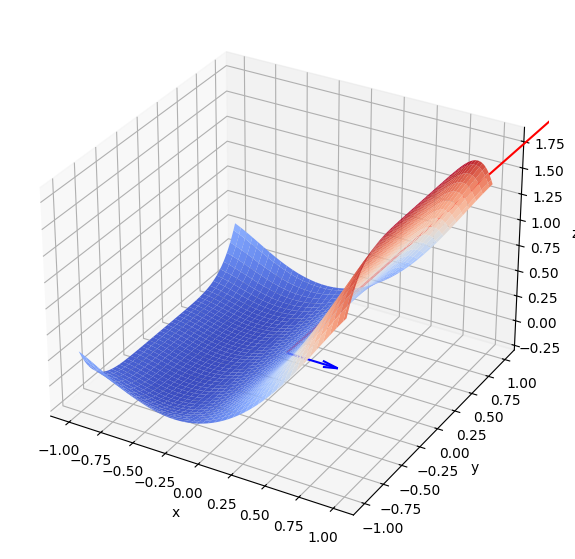

In [79]:
#Inicia el plot
N=256
arrange=[-1,1]

x_values=torch.linspace(arrange[0],arrange[1],steps=N)
y_values=torch.linspace(arrange[0],arrange[1],steps=N)

X, Y = torch.meshgrid(x_values,y_values)
Z = funcion_z(X,Y)

fig=plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

origin=[0,0,0]
ax.quiver(origin[0], origin[1], origin[2], vector_p0[:,0],vector_p0[:,1],vector_p0[:,2], color='r')
ax.quiver(origin[0], origin[1], origin[2], vector_p1[:,0],vector_p1[:,1],vector_p1[:,2], color='b')

ax.plot_surface(X.numpy(),Y.numpy(),Z.numpy(),cmap=cm.coolwarm,linewidth=10,antialiased=True)

In [80]:
#Magnitud de los vectores:
print("La magnitud del vector P0 es: ", torch.linalg.vector_norm(vector_p0).item())
print("La magnitud del vector P1 es: ", torch.linalg.vector_norm(vector_p1).item())

La magnitud del vector P0 es:  150.360595703125
La magnitud del vector P1 es:  0.39185723662376404


b) (5 puntos) $z=f\left(x,y\right)=3x^{2}+2y^{4}$, evaluación del gradiente en los puntos $P_{0}=\left(0,0\right)$ y $P_{1}=\left(7.4,-6.3\right)$.
   
El vector gradiente corresponde a:

   $\frac{\delta f}{\delta x}3x^{2}+2y^{4} \rightarrow{3x^{2}=\mathbf{6x}}$

   $\frac{\delta f}{\delta y}3x^{2}+2y^{4} \rightarrow{2y^{4}=\mathbf{8y^{3}}}$

   $\mathbf{\nabla f(x,y)=6x\hat{i}+8y^{3}\hat{j}}$

In [81]:
#Función multivariable original
def funcion_z(X, Y):
    return (3*X**2) + (2*Y**4)

#Calculo del Vector Gradiente (Derivadas parciales)
def dx(X,Y):
    return 6*X

def dy(X,Y):
    return 8*Y**3

def vector_gradiente(X,Y):
    return [dx(X,Y),dy(X,Y),0]


P0=torch.tensor([0,0], dtype = torch.float)
P1=torch.tensor([7.4,-6.3], dtype = torch.float)

vector_p0=torch.tensor([vector_gradiente(P0[0],P0[1])], dtype = torch.float)
vector_p1=torch.tensor([vector_gradiente(P1[0],P1[1])], dtype = torch.float)

print("El valor del vector gradiente para el punto P0=(0, 0) es: ", vector_p0)
print("El valor del vector gradiente para el punto P1=(7.4, -6.3) es: ", vector_p1)

El valor del vector gradiente para el punto P0=(0, 0) es:  tensor([[0., 0., 0.]])
El valor del vector gradiente para el punto P1=(7.4, -6.3) es:  tensor([[   44.4000, -2000.3762,     0.0000]])


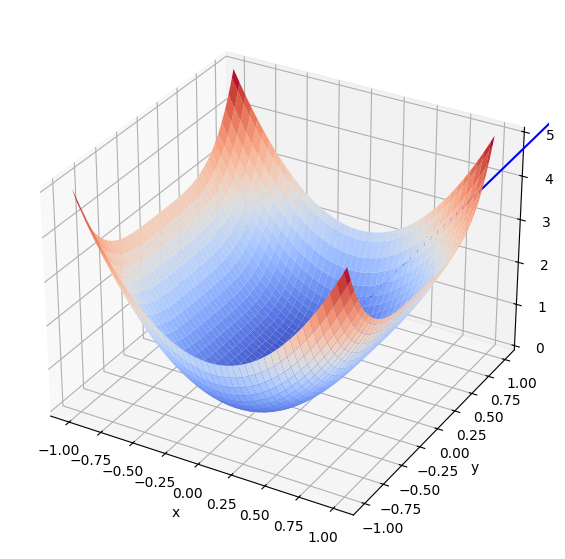

In [82]:
#Inicia el plot
N=256
arrange=[-1,1]

x_values=torch.linspace(arrange[0],arrange[1],steps=N)
y_values=torch.linspace(arrange[0],arrange[1],steps=N)

X, Y = torch.meshgrid(x_values,y_values)
Z = funcion_z(X,Y)

fig=plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

origin=[0,0,0]
ax.quiver(origin[0], origin[1], origin[2], vector_p0[:,0],vector_p0[:,1],vector_p0[:,2], color='r')
ax.quiver(origin[0], origin[1], origin[2], vector_p1[:,0],vector_p1[:,1],vector_p1[:,2], color='b')

ax.plot_surface(X.numpy(),Y.numpy(),Z.numpy(),cmap=cm.coolwarm,linewidth=10,antialiased=True)

In [83]:
#Magnitud de los vectores:
print("La magnitud del vector P0 es: ", torch.linalg.vector_norm(vector_p0))
print("La magnitud del vector P1 es: ", torch.linalg.vector_norm(vector_p1))

La magnitud del vector P0 es:  tensor(0.)
La magnitud del vector P1 es:  tensor(2000.8689)


c) (5 puntos) $z=f\left(x,y\right)=4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1$, evaluación del gradiente en los puntos $P_{0}=\left(2,1\right)$ y $P_{1}=\left(5,7\right)$.

El vector gradiente corresponde a:

   $\frac{\delta f}{\delta x}4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1 \rightarrow{8x+2+2e^{2x}+0+0+0=8x+2+2e^{2x}=\mathbf{2(4x+e^{2x}+1)}}$

   $\frac{\delta f}{\delta y}4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1 \rightarrow{0+0+0+10y+3e^{3y}+0=\mathbf{10y+3e^{3y}}}$

   $\nabla f(x,y)=2(4x+e^{2x}+1)\hat{i}+10y+3e^{3y}\hat{j}$

Gráfica de la superficie de la función:

In [84]:
#Función multivariable original
def funcion_z(X, Y):
    return (4*X**2) + (2*X) + (torch.e**(2*X)) + (5*Y**2) + (torch.e**(3*Y)) + 1

#Calculo del Vector Gradiente (Derivadas parciales)
def dx(X,Y):
    return 2*((4*X)+torch.e**(2*X)+1)

def dy(X,Y):
    return (10*Y)+(3*torch.e**(3*Y))

def vector_gradiente(X,Y):
    return [dx(X,Y),dy(X,Y),0]


P0=torch.tensor([2,1], dtype = torch.float)
P1=torch.tensor([5,7], dtype = torch.float)

vector_p0=torch.tensor([vector_gradiente(P0[0],P0[1])], dtype = torch.float)
vector_p1=torch.tensor([vector_gradiente(P1[0],P1[1])], dtype = torch.float)

print("El valor del vector gradiente para el punto P0=(2, 1) es: ", vector_p0)
print("El valor del vector gradiente para el punto P1=(5, 7) es: ", vector_p1)

El valor del vector gradiente para el punto P0=(2, 1) es:  tensor([[127.1963,  70.2566,   0.0000]])
El valor del vector gradiente para el punto P1=(5, 7) es:  tensor([[4.4095e+04, 3.9564e+09, 0.0000e+00]])


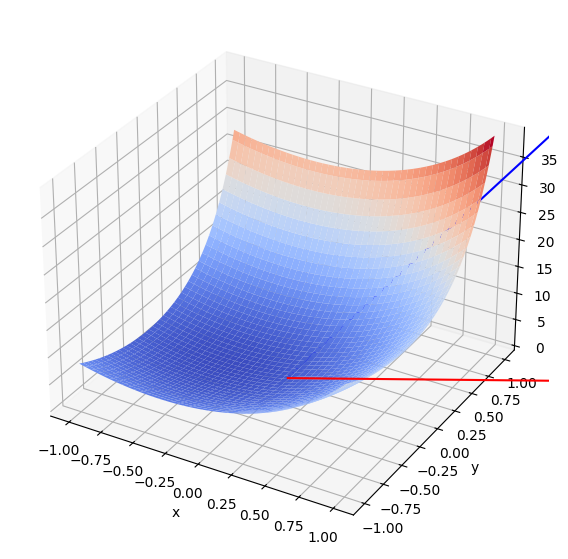

In [85]:
#Inicia el plot
N=256
arrange=[-1,1]

x_values=torch.linspace(arrange[0],arrange[1],steps=N)
y_values=torch.linspace(arrange[0],arrange[1],steps=N)

X, Y = torch.meshgrid(x_values,y_values)
Z = funcion_z(X,Y)

fig=plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

origin=[0,0,0]
ax.quiver(origin[0], origin[1], origin[2], vector_p0[:,0],vector_p0[:,1],vector_p0[:,2], color='r')
ax.quiver(origin[0], origin[1], origin[2], vector_p1[:,0],vector_p1[:,1],vector_p1[:,2], color='b')

ax.plot_surface(X.numpy(),Y.numpy(),Z.numpy(),cmap=cm.coolwarm,linewidth=10,antialiased=True)

In [86]:
#Magnitud de los vectores:
print("La magnitud del vector P0 es: ", torch.linalg.vector_norm(vector_p0))
print("La magnitud del vector P1 es: ", torch.linalg.vector_norm(vector_p1))

La magnitud del vector P0 es:  tensor(145.3096)
La magnitud del vector P1 es:  tensor(3.9564e+09)


d) (5 puntos) $z=f\left(x,y\right)=\sin\left(x^{2}\right)+x\cos\left(y^{3}\right)$, evaluación del gradiente en los puntos $P_{0}=\left(-2,6\right)$ y $P_{1}=\left(0,4\right)$.

El vector gradiente corresponde a:

   $\frac{\delta f}{\delta x}\sin\left(x^{2}\right)+x\cos\left(y^{3}\right) \rightarrow{cos(x^{2})\cdot2x+cos(y^{3})=\mathbf{2x\cdot cos(x^{2})+cos(y^{3})}}$

   $\frac{\delta f}{\delta y}\sin\left(x^{2}\right)+x\cos\left(y^{3}\right) \rightarrow{-x\cdot sen(y^{3})\cdot3y^{2}=\mathbf{-3xy^{2}\cdot sen(y^{3})}}$

   $\mathbf{\nabla f(x,y)=2x\cdot cos(x^{2})+cos(y^{3})\hat{i}+-3xy^{2}\cdot sen(y^{3})\hat{j}}$

In [87]:
#Función multivariable original
def funcion_z(X, Y):
    return torch.sin(X**2) + (X*torch.cos(Y**3))

#Calculo del Vector Gradiente (Derivadas parciales)
def dx(X,Y):
    return 2*X*torch.cos(X**2)+torch.cos(Y**3)

def dy(X,Y):
    return -3*X*(Y**2)*torch.sin(Y**3)

def vector_gradiente(X,Y):
    return [dx(X,Y),dy(X,Y),0]

P0=torch.tensor([-2,6], dtype = torch.float)
P1=torch.tensor([0,4], dtype = torch.float)

vector_p0=torch.tensor([vector_gradiente(P0[0],P0[1])], dtype = torch.float)
vector_p1=torch.tensor([vector_gradiente(P1[0],P1[1])], dtype = torch.float)

print("El valor del vector gradiente para el punto P0=(-2, 6) es: ", vector_p0)
print("El valor del vector gradiente para el punto P1=(0, 4) es: ", vector_p1)

El valor del vector gradiente para el punto P0=(-2, 6) es:  tensor([[  1.8966, 150.3486,   0.0000]])
El valor del vector gradiente para el punto P1=(0, 4) es:  tensor([[0.3919, -0.0000, 0.0000]])


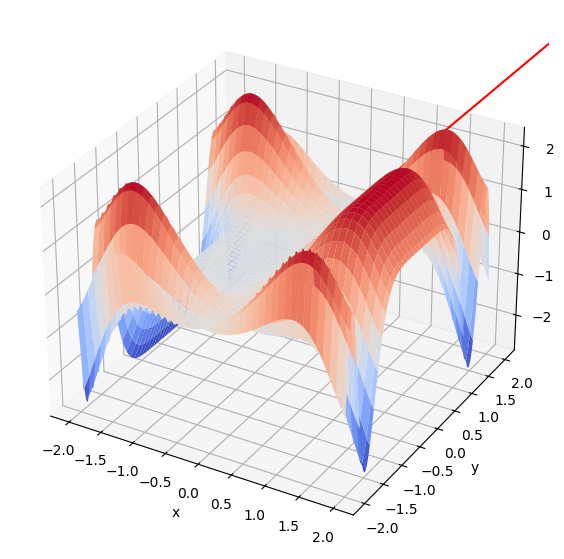

In [88]:
#Inicia el plot
N=256
arrange=[-2,2]

x_values=torch.linspace(arrange[0],arrange[1],steps=N)
y_values=torch.linspace(arrange[0],arrange[1],steps=N)

X, Y = torch.meshgrid(x_values,y_values)
Z = funcion_z(X,Y)

fig=plt.figure(figsize=(7,7))

ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

origin=[0,0,0]
ax.quiver(origin[0], origin[1], origin[2], vector_p0[:,0],vector_p0[:,1],vector_p0[:,2], color='r')
ax.quiver(origin[0], origin[1], origin[2], vector_p1[:,0],vector_p1[:,1],vector_p1[:,2], color='b')

ax.plot_surface(X.numpy(),Y.numpy(),Z.numpy(),cmap=cm.coolwarm,linewidth=10,antialiased=True)

In [89]:
#Magnitud de los vectores:
print("La magnitud del vector P0 es: ", torch.linalg.vector_norm(vector_p0))
print("La magnitud del vector P1 es: ", torch.linalg.vector_norm(vector_p1))

La magnitud del vector P0 es:  tensor(150.3606)
La magnitud del vector P1 es:  tensor(0.3919)


2. (10 puntos) En general, investigue ¿qué es y que indica la matriz Hessiana?
    Sobre las aplicaciones de esta matriz, se pueden citar los siguientes puntos:

    * Se define como una matriz cuadrada de $nxn$ que se compone de las segundas derivada parciales de la función multivariable, por ejemplo para funciones de dos variables:
    $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta y\delta x}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)$

    * Por Teorema de Schwarz se puede decir que $\frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}$

    * Permite encontrar ya sea máximos o mínimos de funciones multivariable. Para conseguir esto, el procedimiento a seguir consiste de obtener los puntos críticos de la función (igualando a cero el vector gradiente y obteniendo los puntos respectivos del despeje) y operarlos con la matriz Hessiana.

    * Una vez obtenido el resultado, la matriz que se consiguió debe ser evaluada bajo el criterio de: definida positiva, definida negativa, indefinida, etc (lo cual puede ser establecido con el Criterio de los valores propios o con el Criterio de Sylvester).

    * Dependiendo del tipo de matriz obtenida, así podrá definirse el punto que fue utilizado para el cálculo (máximo, mínimo o un punto neutro).

    * También permite saber si una función es cóncava o convexa con respecto a un conjunto de puntos pertenecientes a la función, aplicando nuevamente el concepto de definida positiva, definida negativa, indefinida, etc.

    * Fuentes utilizadas para cálculo y usos:
        * [Matriz Hessiana (o Hessiano)](https://www.matricesydeterminantes.com/matrices/matriz-hessiana-hessiano-2x2-3x3/)
        * [La matriz hessiana](https://es.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian)

    a) Para cada una de los puntos 1.a, 1.b, 1.c, y 1.d calcule la matriz Hessiana:

    * 1.a Para $f\left(x,y\right)=\sqrt{x^{2}+y^{2}}$

        * $\frac{\delta f}{\delta x}=\frac{x}{\sqrt{x^{2}+y^{2}}}$

        * $\frac{\delta f}{\delta y}=\frac{y}{\sqrt{x^{2}+y^{2}}}$

        * $\frac{\delta^{2}f}{\delta x^{2}}=\frac{y^{2}}{\sqrt{(x^{2}+y^{2})^{3}}}$

        * $\frac{\delta^{2}f}{\delta y^{2}}=\frac{x^{2}}{\sqrt{(x^{2}+y^{2})^{3}}}$

        * $\frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}=\frac{2xy^{2}-x^{3}}{(x^{2}+y^{2})\sqrt{(x^{2}+y^{2})^{3}}}$

        * $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta x\delta y}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)=\left(\begin{array}{cc}\frac{y^{2}}{\sqrt{(x^{2}+y^{2})^{3}}} & \frac{2xy^{2}-x^{3}}{(x^{2}y^{2})\sqrt{(x^{2}+y^{2})^{3}}}\\\frac{2xy^{2}-x^{3}}{(x^{2}+y^{2})\sqrt{(x^{2}+y^{2})^{3}}} & \frac{x^{2}}{\sqrt{(x^{2}+y^{2})^{3}}}\end{array}\right)$

    * 1.b Para $z=f\left(x,y\right)=3x^{2}+2y^{4}$

        * $\frac{\delta f}{\delta x}=6x$

        * $\frac{\delta f}{\delta y}=8y^{3}$

        * $\frac{\delta^{2}f}{\delta x^{2}}=6$

        * $\frac{\delta^{2}f}{\delta y^{2}}=24y^{2}$

        * $\frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}=0$

        * $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta x\delta y}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)=\left(\begin{array}{cc}6 & 0\\0 & 24y^{2}\end{array}\right)$

    * 1.c Para $z=f\left(x,y\right)=4x^{2}+2x+e^{2x}+5y^{2}+e^{3y}+1$

        * $\frac{\delta f}{\delta x}=2(4x+e^{2x}+1)$

        * $\frac{\delta f}{\delta y}=10y+3e^{3y}$

        * $\frac{\delta^{2}f}{\delta x^{2}}=4(e^{2x}+2)$

        * $\frac{\delta^{2}f}{\delta y^{2}}=9e^{3y}+10$

        * $\frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}=0$

        * $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta x\delta y}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)=\left(\begin{array}{cc}4(e^{2x}+2) & 0\\0 & 9e^{3y}+10\end{array}\right)$

    * 1.b Para $z=f\left(x,y\right)=\sin\left(x^{2}\right)+x\cos\left(y^{3}\right)$

        * $\frac{\delta f}{\delta x}=2x\cdot cos(x^{2})+cos(y^{3})$

        * $ \frac{\delta f}{\delta y}=-3xy^{2}\cdot sen(y^{3})$

        * $ \frac{\delta^{2}f}{\delta x^{2}}=2cos(x^{2})-2x^{2}sen(x^{2})$

        * $ \frac{\delta^{2}f}{\delta y^{2}}=-3xy(2sen(y^{3})+3y^{3}cos(y^{3}))$

        * $ \frac{\delta^{2}f}{\delta y\delta x}=\frac{\delta^{2}f}{\delta x\delta y}=-3y^{2}sen(y^{3})$

        * $\mathbf{H}_{f}(x,y)=\left(\begin{array}{cc}\frac{\delta^{2}f}{\delta x^{2}} & \frac{\delta^{2}f}{\delta x\delta y}\\\frac{\delta^{2}f}{\delta y\delta x} & \frac{\delta^{2}f}{\delta y^{2}}\end{array}\right)=\left(\begin{array}{cc}2cos(x^{2})-2x^{2}sen(x^{2}) & -3y^{2}sen(y^{3})\\-3y^{2}sen(y^{3}) & -3xy(2sen(y^{3})+3y^{3}cos(y^{3}))\end{array}\right)$

## 3. (30 puntos) Probabilidades: Algoritmo de Maximización de la Esperanza
A continuación, implemente el algoritmo de maximización de la esperanza (descrito en el material del curso), usando la definición y descripción de las siguientes funciones como base:

In [90]:
# Constantes
# Rangos para inicializar mu
MU_START = 10
MU_END = 50
# Rangos para inicializar sigma
SIGMA_START = 3.1
SIGMA_END = 6.2
# Dato para solucion heuristica
HEURISTIC_STEP = 5

In [91]:
#  Graficar observacion con su funcion de densidad de probabilidad
def plot_observation(observation, show=False):
    mu = torch.mean(observation)
    sigma = torch.std(observation, unbiased=True)
    x_axis = torch.arange(min(observation) - 5, max(observation) + 5, 0.01)
    plt.scatter(observation.numpy(), torch.zeros(len(observation)), s=5, alpha=0.5)
    plt.plot(x_axis.numpy(), norm.pdf(x_axis.numpy(), mu.numpy(), sigma.numpy()),
             label=r'$\mu=' + str(round(mu.item(), 2)) + r',\ \sigma=' + str(round(sigma.item(), 2)) + r'$')
    if show:
        plt.legend()
        plt.show()
        
#  Graficar las distribuciones aleatorias junto con las observaciones        
def plot_gaussian_distribution_and_observations(distribution_parameters, observations, show=False):
    for observation in observations:
        plot_observation(observation)
    param_number = 1
    for parameters in distribution_parameters:
        mu = parameters[0]
        sigma = parameters[1]
        x_axis = torch.arange(mu / 2, mu * 2, 0.01)
        plt.plot(x_axis.numpy(), norm.pdf(x_axis.numpy(), mu.numpy(), sigma.numpy()),
                 label=r'$\mu_' + str(param_number) + r'=' + str(round(mu.item(), 2)) +
                       r',\ \sigma_' + str(param_number) + '=' + str(round(sigma.item(), 2)) + r'$')
        param_number += 1
    if show:
        plt.legend()
        plt.show()

1. Función generate_data:

In [92]:
#  Genera datos siguiendo una distribucion gaussiana 
def generate_data(n_observations: int, k_parameters=2, show=False, heuristic=False):
    gaussian_distributions = []
    heuristic_mu = random.uniform(MU_START, MU_END) if heuristic else 0
    for k in range(k_parameters):
        mu = torch.tensor(random.uniform(MU_START, MU_END)) if not heuristic else torch.tensor(heuristic_mu +
                                                                                               HEURISTIC_STEP)
        heuristic_mu += HEURISTIC_STEP if heuristic else 0
        sigma = torch.tensor(random.uniform(SIGMA_START, SIGMA_END))
        normal_dist = torch.distributions.Normal(mu, sigma)
        sample = normal_dist.sample((n_observations, 1)).squeeze()
        gaussian_distributions.append(sample)
    for distribution in gaussian_distributions:
        plot_observation(distribution)
    if show:
        plt.legend()
        plt.show()
    return gaussian_distributions

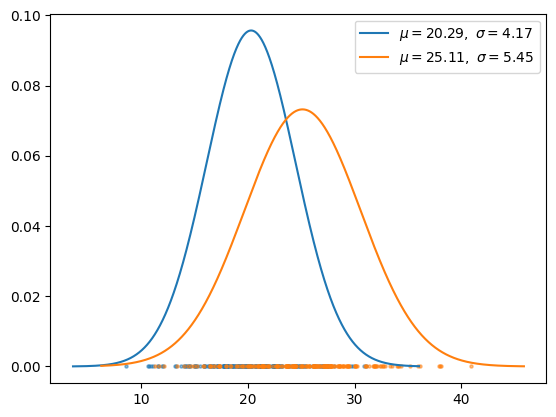

[tensor([27.1639, 27.7981, 35.0825, 31.5618, 34.2390, 31.4812, 31.0738, 44.4531,
        19.1666, 27.8451, 33.6930, 27.8465, 26.0132, 28.6364, 31.3291, 13.4288,
        31.0196, 18.4305, 35.5676, 21.8120, 23.7005, 26.3870, 28.1679, 30.5534,
        39.6114, 22.8342, 29.1155, 28.9149, 35.1563, 28.7984, 33.6284, 37.0563,
        36.9750, 36.3589, 21.0646, 35.9025, 30.4855, 24.1413, 30.2599, 27.4902,
        27.4783, 23.9538, 24.5608, 28.0607, 19.4701, 30.1925, 26.3903, 36.8392,
        41.6364, 37.0113, 29.0209, 23.0637, 33.0610, 37.0625, 29.9968, 36.4574,
        27.8184, 15.3973, 27.1876, 21.4113, 10.4918, 34.2766, 31.7306, 27.2681,
        18.8772, 26.3330, 23.2823, 32.0217, 22.0225, 26.9401, 31.5205, 30.6220,
        37.2049, 31.5084, 26.8664, 34.5802, 33.1321, 42.2391, 19.6919, 33.3315,
        37.6700, 29.1230, 25.4264, 33.8868, 23.9420, 22.3201, 30.7081, 30.4981,
        29.8097, 40.3406, 26.6878, 38.1694, 43.3266, 33.0924, 27.8158, 23.3247,
        25.7902, 28.8903, 25.3729, 42.6

In [93]:
plt.figure()
dataset = generate_data(200, show=False, heuristic=True)
plt.legend()
plt.show()
print(dataset)

2. Función  init_random_parameters:

In [94]:
#  Genera una matris k x 2 con mu y sigma aleatorios
def init_random_parameters(k_parameters=2):
    p_matrix = []
    for k in range(k_parameters):
        mu = torch.tensor(random.uniform(MU_START, MU_END))
        sigma = torch.tensor(random.uniform(SIGMA_START, SIGMA_END))
        p_matrix.append([mu, sigma])
    p_matrix = torch.tensor(p_matrix)
    return p_matrix

In [95]:
random_parameters = init_random_parameters()
print(random_parameters)

tensor([[47.3933,  5.8276],
        [28.8964,  4.5993]])


3. Función calculate_likelihood_gaussian_observation:

In [96]:
#  Calcula la verosimilitud de una observacion con respecto a un mu y sigma para cada dato individual
#  Se utiliza la funcion de densidad de probabilidad gaussiana
def calculate_likelihood_gaussian_observation(x_n, mu_k, sigma_k):
    def probability_density_function(x, mu, sigma):
        return (1/math.sqrt(2 * math.pi * sigma**2)) * math.e**(-(1/2) * ((x-mu) / sigma)**2)
    return probability_density_function(x_n, mu_k, sigma_k)

In [97]:
calculate_likelihood_gaussian_observation(42.3022, 28.0083, 1.5705)

2.612131073896484e-19

Otra función alterna que calcula la verosimilitud para todo un conjunto de datos es:

In [98]:
def calculate_likelihood_dataset(parameters:torch.tensor, samples:torch.tensor):
  mean = parameters[:, 0][:, None]
  std = parameters[:, 1][:, None]
  
  bpart = (1 / torch.sqrt(2 * math.pi * std**2))
  fpart = math.e**(-(1/2) * ((samples.repeat(2, 1) - mean) / std)**2)

  return torch.nan_to_num(bpart * fpart)

In [99]:
membership_matrix = calculate_membership_dataset(dataset, random_parameters)
print(membership_matrix)

tensor([[0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        

In [100]:
#  Devuelve una matriz con todos los calculos de verosimilitud. 
calculate_likelihood_dataset(random_parameters, dataset[0])

tensor([[1.6551e-04, 2.4007e-04, 7.3517e-03, 1.7095e-03, 5.3585e-03, 1.6463e-03,
         1.3569e-03, 6.0276e-02, 5.5089e-07, 2.4665e-04, 4.3181e-03, 2.4686e-04,
         8.1789e-05, 3.8539e-04, 1.5325e-03, 2.8802e-09, 1.3220e-03, 2.9640e-07,
         8.7348e-03, 4.4790e-06, 1.7627e-05, 1.0328e-04, 2.9655e-04, 1.0525e-03,
         2.8068e-02, 9.5258e-06, 5.0044e-04, 4.4895e-04, 7.5502e-03, 4.2130e-04,
         4.2068e-03, 1.4197e-02, 1.3849e-02, 1.1400e-02, 2.5301e-06, 9.7988e-03,
         1.0175e-03, 2.3906e-05, 9.0879e-04, 2.0071e-04, 1.9931e-04, 2.1015e-05,
         3.1777e-05, 2.7906e-04, 7.0798e-07, 8.7831e-04, 1.0348e-04, 1.3280e-02,
         4.2026e-02, 1.4004e-02, 4.7552e-04, 1.1237e-05, 3.3266e-03, 1.4224e-02,
         7.9499e-04, 1.1769e-02, 2.4289e-04, 1.9482e-08, 1.6786e-04, 3.3044e-06,
         1.3448e-10, 5.4370e-03, 1.8486e-03, 1.7608e-04, 4.3256e-07, 9.9878e-05,
         1.3133e-05, 2.1116e-03, 5.2452e-06, 1.4475e-04, 1.6769e-03, 1.0888e-03,
         1.4849e-02, 1.6673e

4. Función calculate_membership_dataset:

In [101]:
#  Calcula la pertenencia de cada observación a los parámetros
#  Se utiliza one hot vector
def calculate_membership_dataset(x_dataset, parameters_matrix):
    likelihood_matrix = []
    for dataset in x_dataset:
        for data in dataset:
            data_likelihood = []
            for matrix in parameters_matrix:
                mu = matrix[0]
                sigma = matrix[1]
                likelihood = calculate_likelihood_gaussian_observation(data.item(), mu.item(), sigma.item())
                data_likelihood.append(likelihood)
            for index in range(len(data_likelihood)):
                data_likelihood[index] = 0 if data_likelihood[index] != max(data_likelihood) else 1
            likelihood_matrix.append(data_likelihood)
    likelihood_matrix = torch.tensor(likelihood_matrix)
    return likelihood_matrix

Otra función alterna y simplificada que calcula matriz de membresía es:

In [102]:
def calculate_membership_dataset_alt(parameters:torch.tensor, samples:torch.tensor):
  original = calculate_likelihood_dataset(parameters, samples)
  transpose_o = torch.t(original)
  maxvalues = torch.amax(transpose_o, 1)
  return torch.where(original == maxvalues, 1.0, 0.0)

In [103]:
calculate_membership_dataset_alt(random_parameters, dataset[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
         0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1

5. Función recalculate_parameters:

In [110]:
#  Se realiza el recálculo de los parámetros
def recalculate_parameters(x_dataset, membership_data):
    membership_data = torch.transpose(membership_data, 0, 1)
    complete_dataset = torch.Tensor()
    new_parameters = []
    for dataset in x_dataset:
        complete_dataset = torch.cat((complete_dataset, dataset))
    for k in membership_data:
        data_set_one = []
        for one_hot_data in range(len(k)):
            if k[one_hot_data].item() == 1:
                data_set_one.append(complete_dataset[one_hot_data])
        data_set_one = torch.Tensor(data_set_one)
        mu = torch.mean(data_set_one)
        sigma = torch.std(data_set_one, unbiased=True)
        # Heurístico: En caso de que ninguna distribución tenga membresía con los parámetros, se reinicializan los parámetros aleatoriamente.
        if mu.item() != mu.item() or sigma.item() != sigma.item():  # if nan
            params = init_random_parameters(1)
            mu = params[0][0]
            sigma = params[0][1]
            new_parameters.append([mu.item(), sigma.item()])
        else:
            new_parameters.append([mu.item(), sigma.item()])
    new_parameters = torch.Tensor(new_parameters)
    return new_parameters

membership_matrix = calculate_membership_dataset(dataset, random_parameters)
recalculate_parameters(dataset, membership_matrix)

KeyboardInterrupt: 

Otra función alterna para el recálculo de parámetros es: 

In [105]:
def recalculate_parameters_alt(one_hot_vector, samples):
  values_per_membership = one_hot_vector * samples
  transpose = torch.t(values_per_membership)

  n_aux = torch.count_nonzero(transpose, 0)
  mean = torch.sum(values_per_membership, 1) / n_aux

  anti_neg_mean = torch.where(transpose == 0, 1, 0)
  anti_neg_mean = (anti_neg_mean * mean) + transpose

  std = torch.sqrt(torch.sum(torch.t((anti_neg_mean - mean)**2), 1) / n_aux)
  return torch.nan_to_num(torch.t(torch.stack([mean, std])))

In [106]:
membership_dataset = calculate_membership_dataset_alt(random_parameters, dataset[0])
recalculate_parameters_alt(membership_dataset, dataset[0])

tensor([[40.1762,  1.8233],
        [28.6891,  5.3460]])

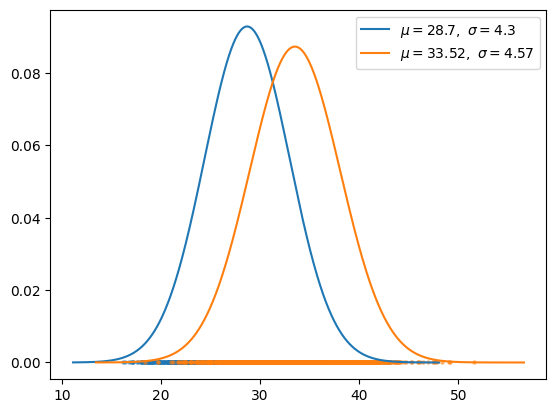

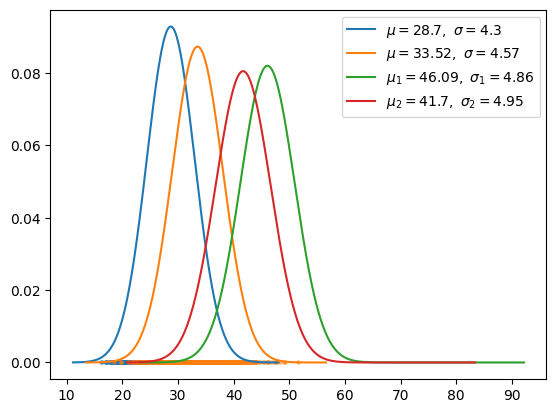

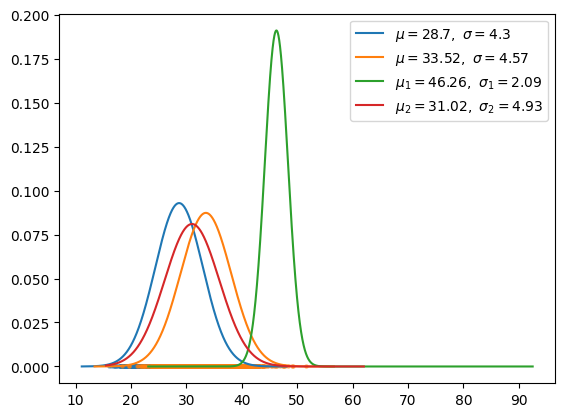

KeyboardInterrupt: 

In [109]:
#  Algoritmo de maximizacion de la esperanza junto
def expectation_maximization(observations=200, k_parameters=2, iterations=5, heuristic=False):
    my_data = generate_data(observations, k_parameters, show=True, heuristic=heuristic)
    parameters = init_random_parameters(k_parameters)
    plot_gaussian_distribution_and_observations(parameters, my_data, show=True)
    for iteration in range(iterations):
        membership_data = calculate_membership_dataset(my_data, parameters)
        parameters = recalculate_parameters(my_data, membership_data)
        plot_gaussian_distribution_and_observations(parameters, my_data, show=True)
        
expectation_maximization(observations=2000, heuristic=True, k_parameters=2, iterations=5)


6. Ejecuta 5 corridas, donde por cada una documente los parámetros a los que se arribó.

A continuación se muestran las corridas, los parámetros a los que se arribó se imprimen en los gráficos.

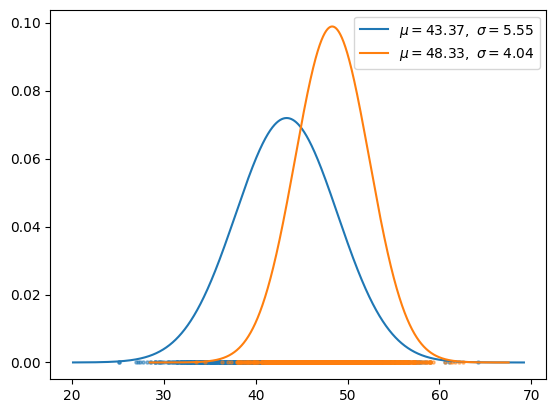

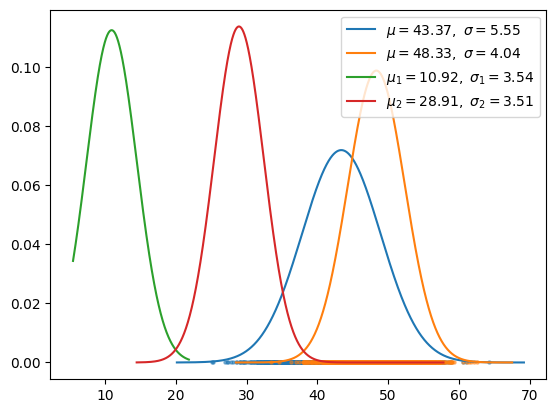

C:\Users\User\AppData\Local\Temp\ipykernel_38060\1184377787.py:15: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1760.)
  sigma = torch.std(data_set_one, unbiased=True)


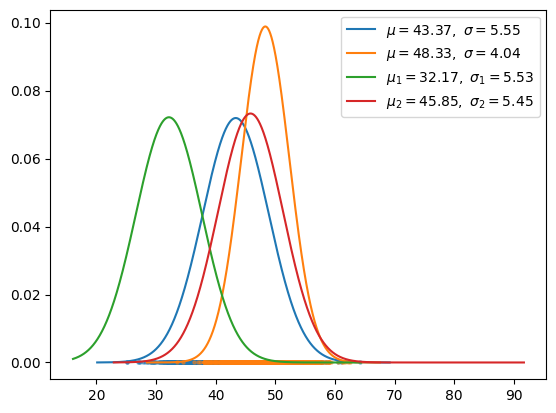

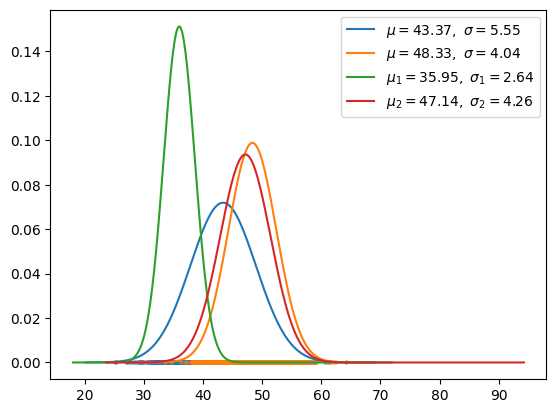

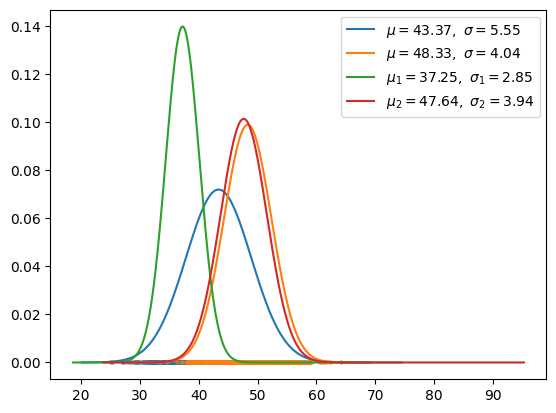

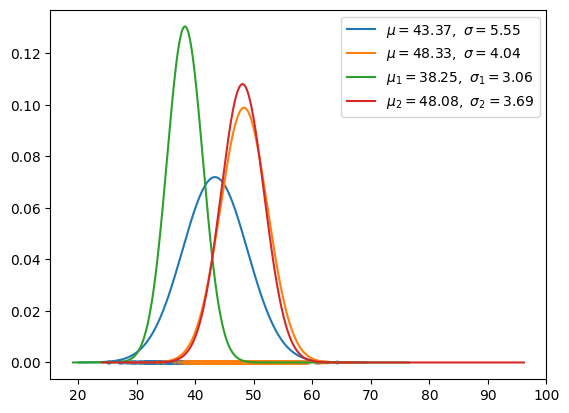

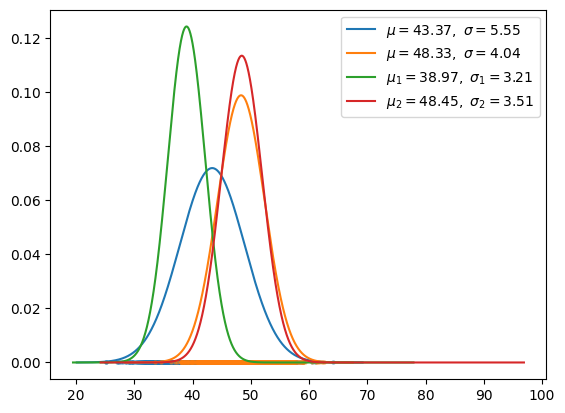

7. Proponga una mejor heurística para inicializar los parámetros del modelo aleatoriamente.

La mejora heurística consiste en inicializar las observaciones de manera que algunos de sus datos se mezclen. Esto se logra inicializando $\mu$’s que tengan una diferencia pequeña definida por una constante que hemos denominado “HEURISTIC_STEP”. Del mismo modo, se puede aumentar la cantidad de observaciones y el sigma se puede hacer más grande.

También, en caso de que la membresía de todas las observaciones se ajusten a un y solo un set de parámetros, se implementó la reinicialización aleatoria de los parámetros para aquel set que no tuvo ninguna membresía; esto fue colocado en la función recalculate_parameters.

Sin esta mejora, el algoritmo tiende mucho a quedarse atascado después de la primera iteración, no sucede el 100% de las veces, pero tiene tendencia a suceder bastante.  

Se pone un ejemplo para ejecutar con el parámetro heuristic=False, en este caso ya ejecutado sucede el comportamiento anteriormente descrito, si se ejecuta nuevamente lo mismo puede suceder: 

(Se sigue tomando en cuenta la reinicialización aleatoria, porque de lo contrario podría causar errores)


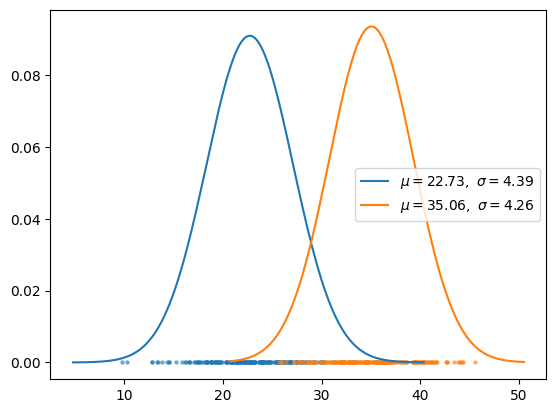

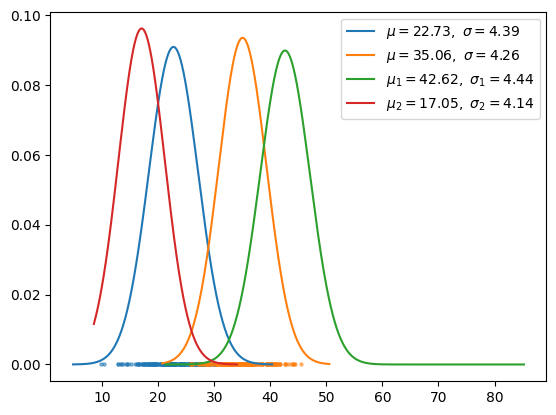

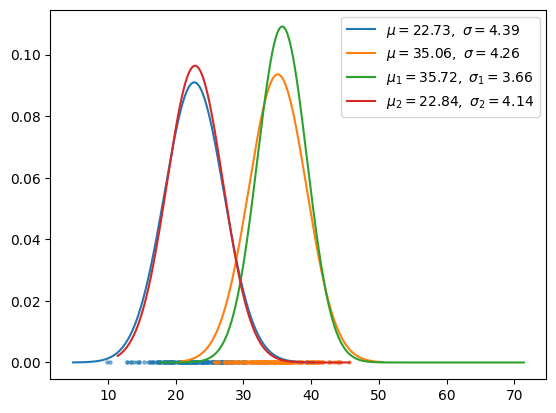

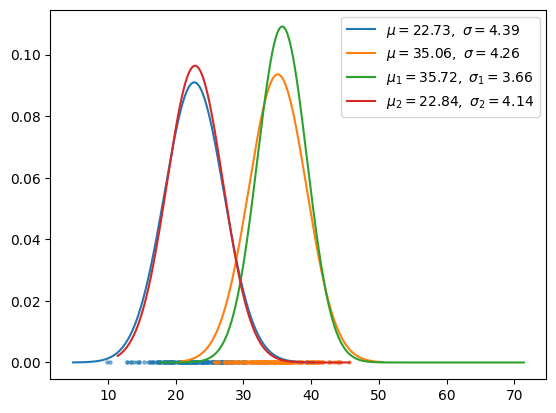

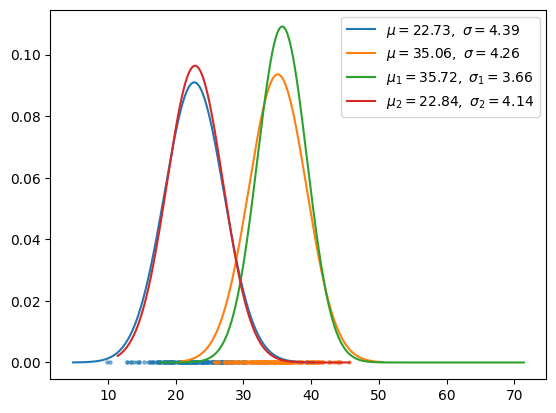

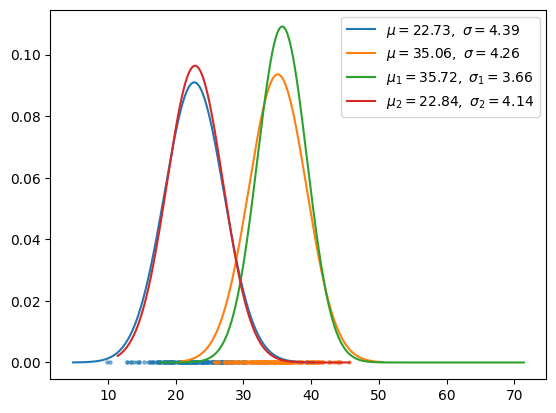

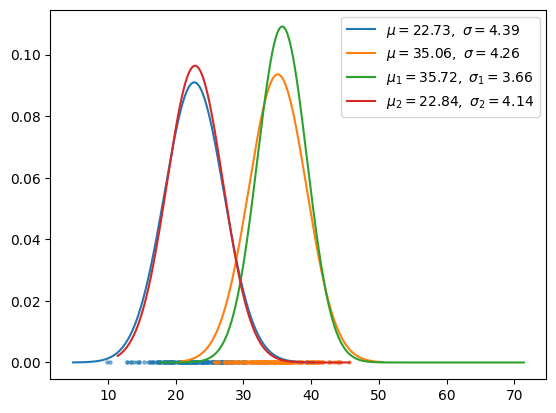

In [35]:
expectation_maximization(observations=200, heuristic=False, k_parameters=2, iterations=5)